In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numba import jit
import math
from scipy.special import comb
import scipy.stats as ss

In [21]:
N = 12
length = [i for i in range(10, 1001, 10)]
a = 0
b = 12
mu = N - 12
sigma = 5 / N

In [22]:
uniform_entropy = np.log(b - a)
normal_entropy = (1/2)*np.log(2*math.pi*(sigma**2)) + 1/2

In [23]:
uniform_entropy

2.4849066497880004

In [24]:
normal_entropy

0.5434697958507728

In [25]:
def entropy(freqs):
    logs = np.log(freqs)
    logs = np.where(logs==np.NINF, 0, logs)
    return -sum(freqs*logs)


def get_frequencies(data):
    n = len(data)
    res = ss.relfreq(data, numbins=int(np.log2(n))+1)
    return res.frequency 

In [26]:
@jit
def gen_uniform(a, b, size):
    return (b - a) * np.random.random_sample(size=size) + a

                                                            
def gen_normal(mu, sigma, size):
    source = np.random.random_sample(size=size)
    U1 = source[0:len(source)//2]
    U2 = source[len(source)//2:len(source)]
    logU1 = np.log(U1)
    logU1 = np.where(logU1==np.NINF, 0, logU1)
    Z0 = np.sqrt(-2*logU1)*np.cos(2*math.pi*U2)
    Z1 = np.sqrt(-2*logU1)*np.sin(2*math.pi*U2)
    Z = np.concatenate((Z0, Z1))
    Z = Z*sigma + mu
    return Z

C:\Users\aowl2\AppData\Local\Temp/ipykernel_3344/2206217729.py:2: RuntimeWarning: divide by zero encountered in log
  logs = np.log(freqs)


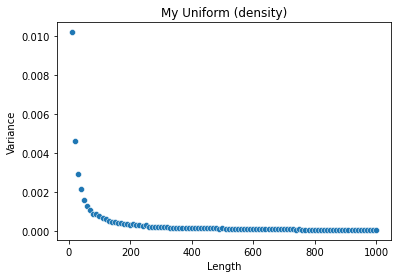

In [27]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        uni_sample = gen_uniform(a, b, l)

        entr = entropy(get_frequencies(uni_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - uniform_entropy), ddof=1)
    variances = np.append(variances, variance)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('My Uniform (density)')
plt.show()

C:\Users\aowl2\AppData\Local\Temp/ipykernel_3344/2206217729.py:2: RuntimeWarning: divide by zero encountered in log
  logs = np.log(freqs)


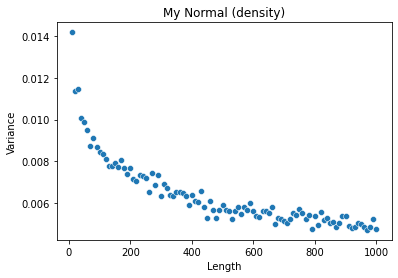

In [28]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        norm_sample = gen_normal(mu, sigma, l)
        entr = entropy(get_frequencies(norm_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - normal_entropy), ddof=1)
    variances = np.append(variances, variance)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('My Normal (density)')
plt.show()

C:\Users\aowl2\AppData\Local\Temp/ipykernel_3344/2206217729.py:2: RuntimeWarning: divide by zero encountered in log
  logs = np.log(freqs)


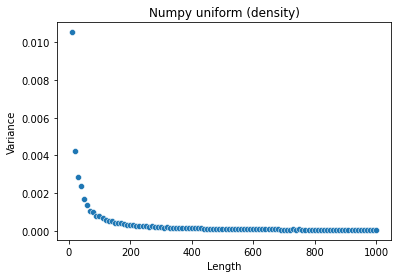

In [29]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        uni_sample = np.random.uniform(a, b, l)
        entr = entropy(get_frequencies(uni_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - uniform_entropy), ddof=1)
    variances = np.append(variances, variance)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('Numpy uniform (density)')
plt.show()

C:\Users\aowl2\AppData\Local\Temp/ipykernel_3344/2206217729.py:2: RuntimeWarning: divide by zero encountered in log
  logs = np.log(freqs)


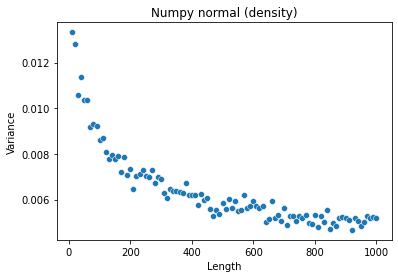

In [30]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        norm_sample = np.random.normal(mu, sigma, l)
        entr = entropy(get_frequencies(norm_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - normal_entropy), ddof=1)
    variances = np.append(variances, variance)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('Numpy normal (density)')
plt.show()

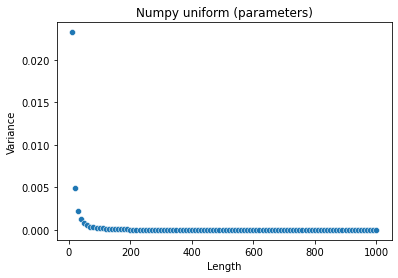

In [31]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        uni_sample = np.random.uniform(a, b, l)
        entr = np.log(np.amax(uni_sample) - np.amin(uni_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - uniform_entropy), ddof=1)
    variances = np.append(variances, variance)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('Numpy uniform (parameters)')
plt.show()

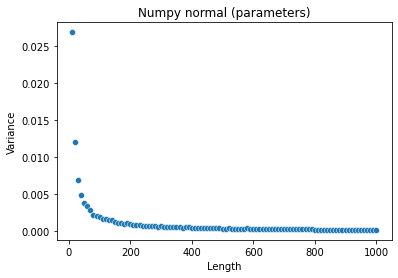

In [32]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        norm_sample = np.random.normal(mu, sigma, l)
        s = np.std(norm_sample, ddof=1)
        entr = (1/2)*np.log(2*math.pi*(s**2)) + 1/2
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - normal_entropy), ddof=1)
    variances = np.append(variances, variance)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('Numpy normal (parameters)')
plt.show()

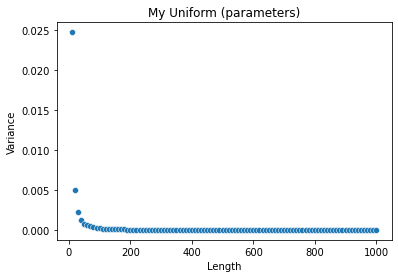

In [33]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        uni_sample = gen_uniform(a, b, l)
        entr = np.log(np.amax(uni_sample) - np.amin(uni_sample))
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - uniform_entropy), ddof=1)
    variances = np.append(variances, variance)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('My Uniform (parameters)')
plt.show()

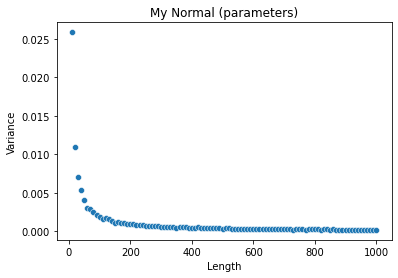

In [34]:
variances = np.array([])
for l in length:
    entropies = np.array([])
    for i in range(1000):
        norm_sample = gen_normal(mu, sigma, l)
        s = np.std(norm_sample, ddof=1)
        entr = (1/2)*np.log(2*math.pi*(s**2)) + 1/2
        entropies = np.append(entropies, entr)
    variance = np.var(abs(entropies - normal_entropy), ddof=1)
    variances = np.append(variances, variance)

ax = sns.scatterplot(x=length, y=variances)
ax.set_xlabel('Length')
ax.set_ylabel('Variance')
ax.set_title('My Normal (parameters)')
plt.show()